In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import StrMethodFormatter
import warnings

%matplotlib inline
#%config InlineBackend.figure_format = 'svg'
warnings.filterwarnings('ignore')

In [29]:
import os

for dirname, _, filenames in os.walk('input'):
    for filename in filenames:
        print(dirname+filename)

input/real_estate_price_prediction_moscowsample_submission.csv
input/real_estate_price_prediction_moscowtest.csv
input/real_estate_price_prediction_moscowtrain.csv


In [ ]:
TRAIN_DATASET_PATH = './csv/train.csv'

In [31]:

df = pd.read_csv(TRAIN_DATASET_PATH, sep=',')
df.head(3)

df.rename(columns={'Helthcare_2': 'Healthcare_2'}, inplace=True)
df.drop(columns='Id', inplace=True)

In [3]:
df.shape

(10000, 19)

In [4]:
df2 = df.copy()

# 1. Emissions

#### HouseYear

In [5]:
df.loc[((df['HouseYear'] > 2020) | (df['HouseYear'] < 1900)), 'HouseYear'] = int(df['HouseYear'].median())

#### Square, LifeSquare

In [6]:
df.loc[df['Square'] > 300, 'Square'] = df['Square'].median()
df.loc[df['LifeSquare'] > 300, 'LifeSquare'] = df['LifeSquare'].median()

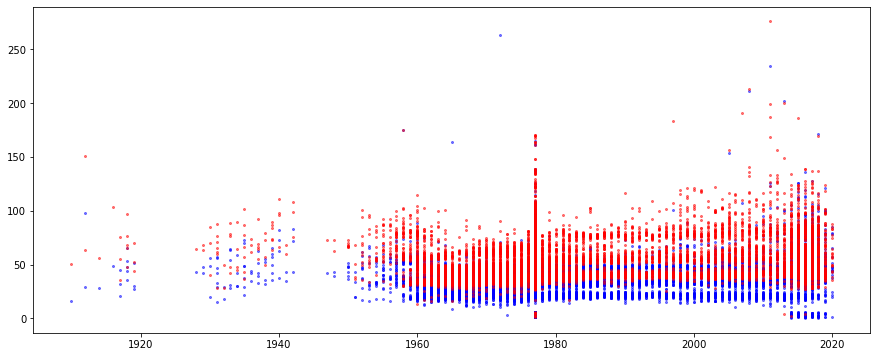

In [7]:
fig = plt.figure(figsize=(15, 6))
ax1 = fig.add_subplot(111)


x = df['HouseYear'] 
y1 = df['LifeSquare']
y2 = df['Square']

ax1.scatter(x, y1, c='b', alpha=0.5, s=4)
ax1.scatter(x, y2, c='r', alpha=0.5, s=4)
plt.show()

#### Rooms

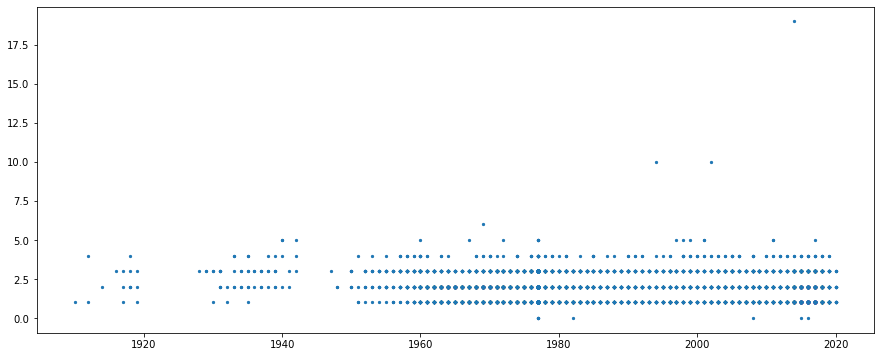

In [8]:
a = df['HouseYear'] 
b = df['Rooms']
plt.figure(figsize=(15, 6))
plt.scatter(a, b, s=5)

In [9]:
district_mean_rooms = df.groupby('DistrictId')[['Rooms', 'Square']].sum()
district_mean_rooms = pd.DataFrame(district_mean_rooms['Square'] / district_mean_rooms['Rooms'])
district_mean_rooms.rename(columns={0: 'MeanValueRooms'}, inplace=True)
df = df.merge(district_mean_rooms, on=['DistrictId'])

#### KitchenSquare

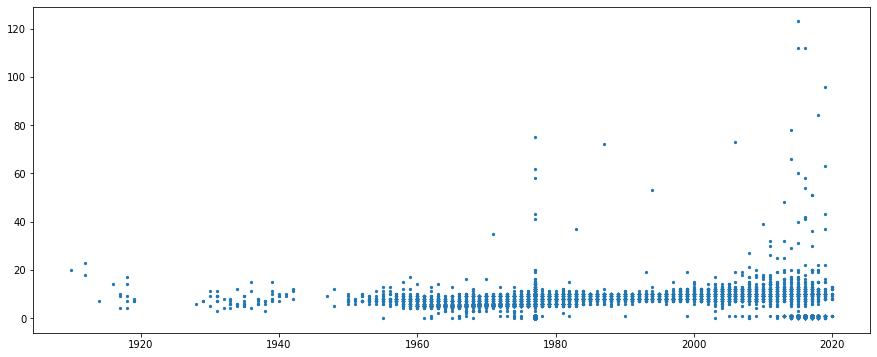

In [10]:
df.loc[df['KitchenSquare'] > 300, 'KitchenSquare'] = df['KitchenSquare'].median()
a = df['HouseYear'] 
b = df['KitchenSquare']
plt.figure(figsize=(15, 6))
plt.scatter(a, b, s=5)

#### HouseFloor

In [11]:

df.loc[df['HouseFloor'] == 0, 'HouseFloor'] = df[df['HouseFloor'] == 0]['Floor']
df = df.astype({'HouseFloor': int})

#### Floor

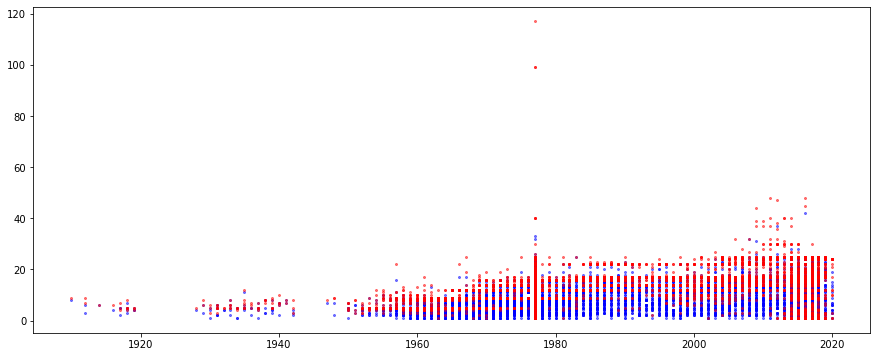

In [12]:
df.loc[df['Floor'] > df['HouseFloor'], 'Floor'] = df[df['Floor'] > df['HouseFloor']]['HouseFloor']

fig = plt.figure(figsize=(15, 6))
ax2 = fig.add_subplot()


x = df['HouseYear'] 
y1 = df['Floor']
y2 = df['HouseFloor']

ax2.scatter(x, y1, c='b', alpha=0.5, s=4)
ax2.scatter(x, y2, c='r', alpha=0.5, s=4)
plt.show()

## 2. NaN

In [13]:
df.describe()
# NaN in LifeSquare 10000 - 7887 = 2113
# NaN in Healthcare_1 10000 - 5202 = 4798

DistrictId         Rooms        Square   LifeSquare  KitchenSquare  \
count  10000.000000  10000.000000  10000.000000  7887.000000   10000.000000   
mean      50.400800      1.890500     56.166010    36.076311       5.876100   
std       43.587592      0.839512     19.149659    18.010013       5.174014   
min        0.000000      0.000000      1.136859     0.370619       0.000000   
25%       20.000000      1.000000     41.774881    22.769832       1.000000   
50%       36.000000      2.000000     52.513040    32.781260       6.000000   
75%       75.000000      2.000000     65.889736    45.104632       9.000000   
max      209.000000     19.000000    275.645284   263.542020     123.000000   

              Floor    HouseFloor     HouseYear     Ecology_1      Social_1  \
count  10000.000000  10000.000000  10000.000000  10000.000000  10000.000000   
mean       7.943200     12.852200   1984.863800      0.118858     24.687000   
std        5.228127      6.536821     18.409979      0.119025     17.532614   
min        1.000000      1.000000   1910.000000      0.000000      0.000000   
25%        4.000000      9.000000   1974.000000      0.017647      6.000000   
50%        7.000000     14.000000   1977.000000      0.075424     25.000000   
75%       11.000000     17.000000   2001.000000      0.195781     36.000000   
max       42.000000    117.000000   2020.000000      0.521867     74.000000   

           Social_2      Social_3  Healthcare_1  Healthcare_2       Shops_1  \
count  10000.000000  10000.000000   5202.000000  10000.000000  10000.000000   
mean    5352.157400      8.039200   1142.904460      1.319500      4.231300   
std     4006.799803     23.831875   1021.517264      1.493601      4.806341   
min      168.000000      0.000000      0.000000      0.000000      0.000000   
25%     1564.000000      0.000000    350.000000      0.000000      1.000000   
50%     5285.000000      2.000000    900.000000      1.000000      3.000000   
75%     7227.000000      5.000000   1548.000000      2.000000      6.000000   
max    19083.000000    141.000000   4849.000000      6.000000     23.000000   

               Price  MeanValueRooms  
count   10000.000000    10000.000000  
mean   214138.857399       29.894917  
std     92872.293865        3.253768  
min     59174.778028       19.727229  
25%    153872.633942       27.054361  
50%    192269.644879       29.398099  
75%    249135.462171       32.620379  
max    633233.466570       43.226985

#### LifeSquare

Find ratio lifeSquare / Square; (by districts) \
Ratio will use for replace NaN LifeSquare

In [14]:
# Select rows with normal 'LifeSquare', where LifeSquare <= Square and 'LifeSquare' != NaN
df_ls = df[~(df['LifeSquare'].isna()) | (df['LifeSquare'] <= df['Square'])]
df_ls.shape

(7887, 20)

In [15]:
# Create ratio lifeSquare / square (for replace NaN LifeSquare) (by DistrictId)
district_sq_mean = df_ls.groupby('DistrictId').mean()['Square']
district_lsq_mean = df_ls.groupby('DistrictId').mean()['LifeSquare']

k_mean_life_square = district_lsq_mean / district_sq_mean

k_mean_life_square = pd.DataFrame(k_mean_life_square)
k_mean_life_square.rename(columns={0: 'MeanLifeSquare'}, inplace=True)

In [16]:
df = df.merge(k_mean_life_square, on=['DistrictId'])

In [17]:
df.loc[(df['LifeSquare'].isna()) | (df['LifeSquare'] > df['Square']), 'LifeSquare'] = \
df.loc[(df['LifeSquare'].isna()) | (df['LifeSquare'] > df['Square']), 'Square'] * df.loc[(df['LifeSquare'].isna()) | (df['LifeSquare'] > df['Square']), 'MeanLifeSquare']

#### Healthcare_1

In [18]:
df.loc[df['Healthcare_1'].isna(), 'Healthcare_1'] = df['Healthcare_1'].median()

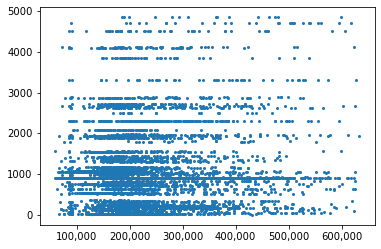

In [30]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.set_xscale('linear')
ax.xaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))
ax.scatter(df['Price'], df['Healthcare_1'], s=4)
plt.show()

In [20]:
df['DistrictId'] = df['DistrictId'].astype(str)